In [1]:
import pandas as pd

In [2]:
# Read the Dataset
dataframe = pd.read_csv("emails.csv")

In [3]:
# Create a Copy of the Dataset to work upon
df = dataframe

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Columns: 3002 entries, Email No. to Prediction
dtypes: int64(3001), object(1)
memory usage: 118.5+ MB


In [5]:
df.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [6]:
# Check for Missing Values
df.isna().sum()

Email No.     0
the           0
to            0
ect           0
and           0
             ..
military      0
allowing      0
ff            0
dry           0
Prediction    0
Length: 3002, dtype: int64

In [7]:
# The 'Email No.' Column is Not Needed, so we drop it
df.drop(["Email No."], axis = 1, inplace = True)

In [8]:
# Set the Independents(x) and the Target Variable(y)
x = df.drop(["Prediction"],axis =1)
y = df["Prediction"]

In [9]:
# Split the Data for Training and Testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)

In [13]:
# KNN Classification
# We use Elbow Method/Continous Iteration to Select the Best Value of K

from sklearn.neighbors import KNeighborsClassifier

In [15]:
from sklearn import metrics
accuracy_values = []

for i in range(1,11):
    model = KNeighborsClassifier(n_neighbors = i)
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    accuracy = metrics.accuracy_score(y_test,y_pred)
    accuracy_values.append(accuracy)

In [16]:
# Finding the Optimal K based on Accuracy Score

optimal_k = -1
optimal_accuracy = -1

for i in list(zip(range(1,11),accuracy_values)):
    if i[1] > optimal_accuracy :
        optimal_k = i[0]
        optimal_accuracy = i[1]

In [17]:
print("Optimal K : " + str(optimal_k))
knn = KNeighborsClassifier(n_neighbors = optimal_k)

Optimal K : 6


In [20]:
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)

In [22]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91       719
           1       0.80      0.80      0.80       316

    accuracy                           0.88      1035
   macro avg       0.86      0.86      0.86      1035
weighted avg       0.88      0.88      0.88      1035



In [23]:
confusion_matrix_knn = metrics.confusion_matrix(y_test,y_pred)
cm_display_knn = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_knn, display_labels = ["False","True"])

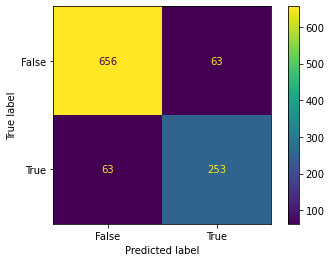

In [24]:
cm_display_knn.plot()

In [25]:
# Can Find the Metrics Manually as well :
# Recall = TP/TP+FN
# Precision = TP/TP+FP
# F1 Score = (Recall*Precision)/(Recall+Precision)
# Accuracy = TP+TN/TP+FP+FN+TN

In [27]:
# SVM 
from sklearn.svm import SVC

In [28]:
svm_model = SVC()

In [29]:
svm_model.fit(x_train,y_train)
y_pred = svm_model.predict(x_test)

In [30]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.97      0.87       719
           1       0.87      0.40      0.55       316

    accuracy                           0.80      1035
   macro avg       0.83      0.69      0.71      1035
weighted avg       0.81      0.80      0.77      1035



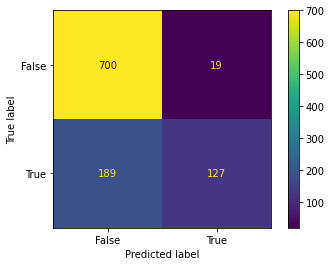

In [31]:
confusion_matrix_svm = metrics.confusion_matrix(y_test,y_pred)
display_cm_svm = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_svm, display_labels=["False","True"])
display_cm_svm.plot()

In [ ]:
# Can Find the Metrics Manually as well :
# Recall = TP/TP+FN
# Precision = TP/TP+FP
# F1 Score = (Recall*Precision)/(Recall+Precision)
# Accuracy = TP+TN/TP+FP+FN+TN